# Data Preparation for Machine Learning

**Data preparation** is a vital step in the machine learning pipeline. Just as visualization is necessary to understand the relationships in data, proper preparation or **data munging** is required to ensure machine learning models work optimally. 

The process of data preparation is highly interactive and iterative. A typical process includes at least the following steps:
1. **Visualization** of the dataset to understand the relationships and identify possible problems with the data.
2. **Data cleaning and transformation** to address the problems identified. It many cases, step 1 is then repeated to verify that the cleaning and transformation had the desired effect. 
3. **Construction and evaluation of a machine learning models**. Visualization of the results will often lead to understanding of further data preparation that is required; going back to step 1. 

In this lab you will learn the following: 
- Recode character strings to eliminate characters that will not be processed correctly.
- Find and treat missing values. 
- Set correct data type of each column. 
- Transform categorical features to create categories with more cases and coding likely to be useful in predicting the label. 
- Apply transformations to numeric features and the label to improve the distribution properties. 
- Locate and treat duplicate cases. 


## Load the dataset

you will prepare the German credit data. As a first step you must load the dataset. 

Execute the code in the cell below to load the packages required  to run this notebook. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [3]:
credit = pd.read_csv('German_Credit.csv', header=None)
credit.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1122334,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2


This dataset is a bit hard to understand. For a start, the column names are not human readable. 

### Recode character strings 

You have likely noticed that the the column names are  not human readable. This can be changed as was done for the previous dataset. Execute the code in the cell below to add human-readable column names to the data frame. 

In [4]:
credit.columns = ['customer_id', 'checking_account_status', 'loan_duration_mo', 'credit_history', 
                  'purpose', 'loan_amount', 'savings_account_balance', 
                  'time_employed_yrs', 'payment_pcnt_income','gender_status', 
                  'other_signators', 'time_in_residence', 'property', 'age_yrs',
                  'other_credit_outstanding', 'home_ownership', 'number_loans', 
                  'job_category', 'dependents', 'telephone', 'foreign_worker', 
                  'bad_credit']
credit.head()

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Next, there is a trickier problem to deal with. The current coding of the categorical variables is impossible to understand. This makes interpreting these variables nearly impossible.  

The code in the cell below uses a list of dictionaries to recode the categorical features with human-readable text. The final dictionary in the list recodes good and bad credit as a binary variable, $\{ 0,1 \}$. Two iterators are used to apply the dictionary:
1. The `for` loop iterates over the columns and indexes the dictionary for the column. 
2. A list comprehension iterates of the values in the column and uses the dictionary to map the codes to human-readable category names. 

Execute this code and examine the result: 

In [5]:
code_list = [['checking_account_status', 
              {'A11' : '< 0 DM', 
               'A12' : '0 - 200 DM', 
               'A13' : '> 200 DM or salary assignment', 
               'A14' : 'none'}],
            ['credit_history',
            {'A30' : 'no credit - paid', 
             'A31' : 'all loans at bank paid', 
             'A32' : 'current loans paid', 
             'A33' : 'past payment delays', 
             'A34' : 'critical account - other non-bank loans'}],
            ['purpose',
            {'A40' : 'car (new)', 
             'A41' : 'car (used)',
             'A42' : 'furniture/equipment',
             'A43' : 'radio/television', 
             'A44' : 'domestic appliances', 
             'A45' : 'repairs', 
             'A46' : 'education', 
             'A47' : 'vacation',
             'A48' : 'retraining',
             'A49' : 'business', 
             'A410' : 'other' }],
            ['savings_account_balance',
            {'A61' : '< 100 DM', 
             'A62' : '100 - 500 DM', 
             'A63' : '500 - 1000 DM', 
             'A64' : '>= 1000 DM',
             'A65' : 'unknown/none' }],
            ['time_employed_yrs',
            {'A71' : 'unemployed',
             'A72' : '< 1 year', 
             'A73' : '1 - 4 years', 
             'A74' : '4 - 7 years', 
             'A75' : '>= 7 years'}],
            ['gender_status',
            {'A91' : 'male-divorced/separated', 
             'A92' : 'female-divorced/separated/married',
             'A93' : 'male-single', 
             'A94' : 'male-married/widowed', 
             'A95' : 'female-single'}],
            ['other_signators',
            {'A101' : 'none', 
             'A102' : 'co-applicant', 
             'A103' : 'guarantor'}],
            ['property',
            {'A121' : 'real estate',
             'A122' : 'building society savings/life insurance', 
             'A123' : 'car or other',
             'A124' : 'unknown-none' }],
            ['other_credit_outstanding',
            {'A141' : 'bank', 
             'A142' : 'stores', 
             'A143' : 'none'}],
             ['home_ownership',
            {'A151' : 'rent', 
             'A152' : 'own', 
             'A153' : 'for free'}],
            ['job_category',
            {'A171' : 'unemployed-unskilled-non-resident', 
             'A172' : 'unskilled-resident', 
             'A173' : 'skilled',
             'A174' : 'highly skilled'}],
            ['telephone', 
            {'A191' : 'none', 
             'A192' : 'yes'}],
            ['foreign_worker',
            {'A201' : 'yes', 
             'A202' : 'no'}],
            ['bad_credit',
            {2 : 1,
             1 : 0}]]

for col_dic in code_list:
    col = col_dic[0]
    dic = col_dic[1]
    credit[col] = [dic[x] for x in credit[col]]
    
credit.head()    

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,1
2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1


The categorical values are now coded in a human readable manner. 

### Remove duplicate rows

Duplicate cases can seriously bias the training of machine learning models. In simple terms, cases which are duplicates add undue weight to that case when training a machine learning model. Therefore, it is necessary to ensure there are no duplicates in the dataset before training a model.  

One must be careful when determining if a case is a duplicate or not. It is possible that some cases have identical values, particularly if most or all features are categorical. On the other hand, if there are columns with values guaranteed to be unique these can be used to detect and remove duplicates.

Another consideration when removing duplicate cases is determining which case to remove. If the duplicates have different dates of creation, the newest date is often selected. In the absence of such a criteria, the choice is often arbitrary. You may chose to keep the first case or the last case. 

The German credit data has a customer_id column which should be unique. In the previous lab, we simply remove the customer_id. Turns out, this identifier column will be useful to determine duplicate rows. The presence of duplicates can be determined by comparing the number of rows to the number of unique values of the identifier column, in this case the customer_id column. The code in the cell below prints the shape of the data frame and the number of unique customer_id values. 

Execute this code, examine the results, and answer **Question 3** on the course page. 

In [6]:
print(credit.shape)
print(credit.customer_id.unique().shape)

(1012, 22)
(1000,)


There are 12 duplicate cases. These need to be located and the duplicates removed. In this case, the first instance will be kept. 

The code in the cell below removes these duplicates from the data frame inplace and the number of remaining rows and unique customer_ids are printed. Execute this code and examine the results. 

In [7]:
credit.drop_duplicates(subset = 'customer_id', keep = 'first', inplace = True)
print(credit.shape)
print(credit.customer_id.unique().shape)

(1000, 22)
(1000,)


The duplicate rows have been successfully removed. 

In [8]:
# Let's save the dataframe to a csv file 
# We will use this in the next module so that we don't have to re-do the steps above
# You don't have to run this code as the csv file has been saved under the next module's folder
#credit.to_csv('German_Credit_Preped.csv', index = False, header = True)

### Feature engineering

Some feature engineering needs to be investigated to determine if any improvement in predictive power can be expected. From the previous data exploration, it is apparent that several of the numeric features had a strong left skew. A log transformation may help in a case like this. 

Execute the code in the cell below uses the Pandas `applymap` method to apply the `log` function to each element of several columns in the data frame. Execute this code.

In [9]:
credit[['log_loan_duration_mo', 'log_loan_amount', 'log_age_yrs']] = credit[['loan_duration_mo', 'loan_amount', 'age_yrs']].applymap(math.log)

Next, execute the code in the cell below to visualize the differences in the distributions of the untransformed and transformed variables for the two label values. 

log_loan_duration_mo


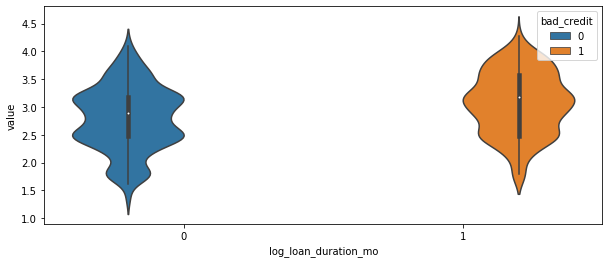

log_loan_amount


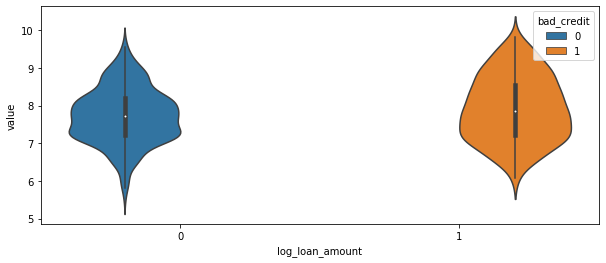

log_age_yrs


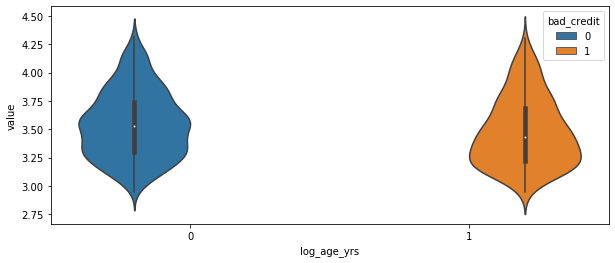

loan_duration_mo


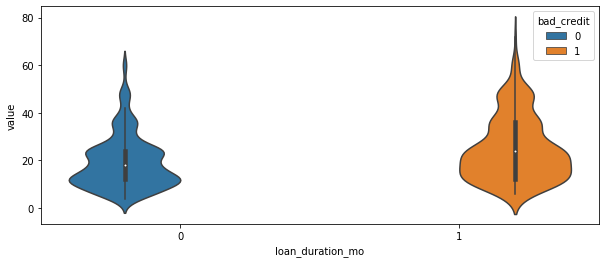

loan_amount


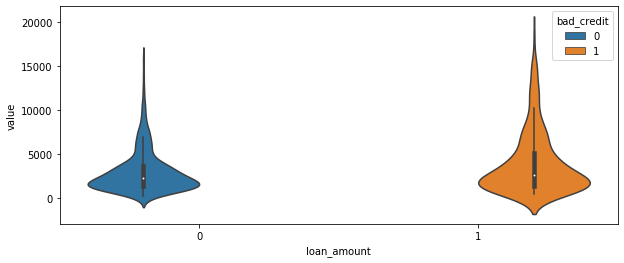

age_yrs


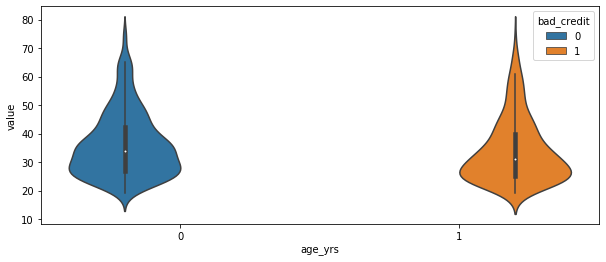

In [13]:
num_cols = ['log_loan_duration_mo', 'log_loan_amount', 'log_age_yrs',
                   'loan_duration_mo', 'loan_amount', 'age_yrs']

for col in num_cols:
    print(col)
    _ = plt.figure(figsize = (10,4))
    sns.violinplot(x= 'bad_credit', y = col, hue='bad_credit',
                   data = credit)
    plt.ylabel('value')
    plt.xlabel(col)
    plt.show()

The log transformed features have more symmetric distributions. However, it does not appear that the separation of the label cases is improved. These features will not be used further.

****
**Note:** Recalling the visualization of the categorical features, there are quite a few categories with few cases. However, it is not clear how these categories can be reasonably combined. It may be the case that some of these categorical features are not terribly predictive.
****

## Summary

Good data preparation is the key to good machine learning performance. Data preparation or data munging is a time interactive and iterative process. Continue to visualize the results as you test ideas. Expect to try many approaches, reject the ones that do not help, and keep the ones that do. In summary, test a lot of ideas, fail fast, keep what works. The reward is that well prepared data can improve the performance of almost any machine learning algorithm.